In [1]:
print(__doc__)

# Code source adapted from: Jaques Grobler
# License: BSD 3 clause

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import os
import csv
import pprint
import time
import itertools
import NeuralNetworkModel as NNM
import LogisticRegressionModel as LRM
import SoftmaxRegressionModel as SRM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits

pp = pprint.PrettyPrinter(indent=4)

Automatically created module for IPython interactive environment


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
# Read and treat training dataset
dataset_train = pandas.read_csv('fashion-mnist-dataset/fashion-mnist_train.csv').values #np.genfromtxt('fashion-mnist-dataset/fashion-mnist_train.csv', delimiter=',')
y_true = dataset_train[:,0]
dataset_train = np.delete(dataset_train, 0, 1).T
dataset_train = (dataset_train-dataset_train.max()/2) / dataset_train.max()

# Read and treat test dataset
dataset_test = pandas.read_csv('fashion-mnist-dataset/fashion-mnist_test.csv').values
target_test = dataset_test[:,0]
dataset_test = np.delete(dataset_test, 0, 1).T
dataset_test = (dataset_test-dataset_test.max()/2) / dataset_test.max()


# Separate train dataset in Train and Validation Data
half = len(y_true)//2

data_train = dataset_train[:,:half]
target_train = y_true[:half]
data_val = dataset_train[:,half:]
target_val = y_true[half:]

## Logistic Regression Model

In [4]:
#######################################
#######                         #######
#######   Logistic Regression   #######
#######                         #######  
#######################################

logistic_model = LRM.Model(data_train, target_train, epochs=1, alpha=0.1, batch_size=1)
logistic_model.Fit()

Class: 9 / 10 Epochs: 1 / 1: 100%|██████████| 30000/30000 [00:00<00:00, 47642.39it/s]


In [5]:
## Result with Logistic Regression VALIDATION
logistic_y_pred = logistic_model.Predict(data_val, target_val)
logistic_conf_matrix_val = confusion_matrix(target_val, logistic_y_pred)
logistic_class_report_val = classification_report(target_val, logistic_y_pred)
print(logistic_conf_matrix_val)
print(logistic_class_report_val)

Predicting Class: 10 / 10: 100%|██████████| 30000/30000 [00:00<00:00, 266622.71it/s]

[[2817    9   16   31   16    0   42    0   30    2]
 [  50 2898    3   28    2    0   15    1    1    0]
 [ 322   12 1621   32  787    0  201    0   32    1]
 [ 579   87   10 2101  139    0   60    0   11    0]
 [ 144   12  116   63 2566    0  170    0   29    0]
 [ 250    9    9    7    3 2144    4  388   49  155]
 [1123   13  184   28  565    1  987    2   55    4]
 [  25    0    0    0    1   54    0 2683   13  168]
 [ 256    4   16   16   39   14   70   28 2553   11]
 [  29    1    3    1    0   53    3  222    5 2696]]
             precision    recall  f1-score   support

          0       0.50      0.95      0.66      2963
          1       0.95      0.97      0.96      2998
          2       0.82      0.54      0.65      3008
          3       0.91      0.70      0.79      2987
          4       0.62      0.83      0.71      3100
          5       0.95      0.71      0.81      3018
          6       0.64      0.33      0.44      2962
          7       0.81      0.91      0.86  

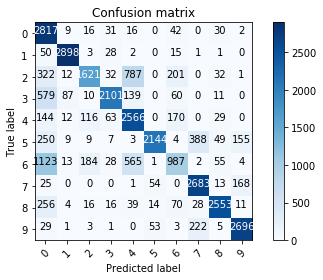

In [6]:
plt.figure()
plot_confusion_matrix(logistic_conf_matrix_val, np.arange(10))
plt.show()

## Softmax Regression Model

In [7]:
#######################################
#######                         #######
#######   Softmax Regression    #######
#######                         #######  
#######################################

softmax_model = SRM.Model(data_train, target_train, epochs=1, alpha=0.1, batch_size=1)
softmax_model.Fit()

Epochs: 1 / 1: 100%|██████████| 30000/30000 [00:05<00:00, 5272.46it/s]


In [8]:
## Result with Softmax Regression VALIDATION
softmax_y_pred = softmax_model.Predict(data_val, target_val)
softmax_conf_matrix_val = confusion_matrix(target_val, softmax_y_pred)
softmax_class_report_val = classification_report(target_val, softmax_y_pred)
print(softmax_conf_matrix_val)
print(softmax_class_report_val)

Predicting: 100%|██████████| 30000/30000 [00:01<00:00, 27877.98it/s]


[[2803   15   33   24    8    0   55    0   25    0]
 [  80 2872   23   20    0    0    2    0    1    0]
 [ 211   12 2464   21  206    2   72    1   19    0]
 [ 632  127   29 2075   69    0   46    2    7    0]
 [ 140   13 1054  114 1660    0  101    0   18    0]
 [  39    2    3    2    0 2579    0  175   60  158]
 [1002   12  586   37  430    0  843    0   50    2]
 [   5    0    0    0    0   92    0 2589    5  253]
 [ 114    2   31   18   20   19   24   19 2757    3]
 [   9    1    0    0    0   80    0  119    7 2797]]
             precision    recall  f1-score   support

          0       0.56      0.95      0.70      2963
          1       0.94      0.96      0.95      2998
          2       0.58      0.82      0.68      3008
          3       0.90      0.69      0.78      2987
          4       0.69      0.54      0.60      3100
          5       0.93      0.85      0.89      3018
          6       0.74      0.28      0.41      2962
          7       0.89      0.88      0.89  

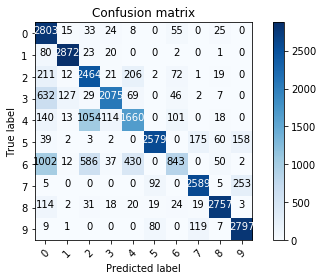

In [9]:
plt.figure()
plot_confusion_matrix(softmax_conf_matrix_val, np.arange(10))
plt.show()

## Neural Network Model

In [10]:
#######################################
#######                         #######
#######     Neural Network      #######
#######                         #######  
#######################################

neural_model = NNM.Model(data_train, target_train, activation="sigmoid", epochs=1, alpha=0.1, l_hidden=1, hidden_neurons=512, batch_size=1, use_softmax=False, epsilon=0.5)
neural_model.fit()

Epochs: 1 / 1: 100%|██████████| 30000/30000 [02:06<00:00, 237.22it/s]


In [11]:
## Result with ReLU, 512 hidden neurons and 1 hidden layer VALIDATION
neural_y_pred_val = neural_model.Predict(data_val, target_val)
neural_conf_matrix_val = confusion_matrix(target_val, neural_y_pred_val)
neural_class_report_val = classification_report(target_val, neural_y_pred_val)
print(neural_conf_matrix_val)
print(neural_class_report_val)


Predicting: 100%|██████████| 30000/30000 [00:19<00:00, 1513.48it/s]


[[2368   10   69  140    8   17  321    0   30    0]
 [   6 2894   13   80    0    1    2    0    2    0]
 [  24    2 2452   33  301    5  177    0   14    0]
 [ 132   23   37 2593  110    7   61    0   24    0]
 [  11    6  473  121 2174    3  297    0   15    0]
 [   1    0    0    1    0 2672    0  283    9   52]
 [ 414   11  445  107  169   13 1766    2   34    1]
 [   0    0    0    0    0   45    0 2801    3   95]
 [   2    1   33   11    9   49   38   30 2834    0]
 [   0    0    1    0    0   68    0  189    1 2754]]
             precision    recall  f1-score   support

          0       0.80      0.80      0.80      2963
          1       0.98      0.97      0.97      2998
          2       0.70      0.82      0.75      3008
          3       0.84      0.87      0.85      2987
          4       0.78      0.70      0.74      3100
          5       0.93      0.89      0.91      3018
          6       0.66      0.60      0.63      2962
          7       0.85      0.95      0.90  

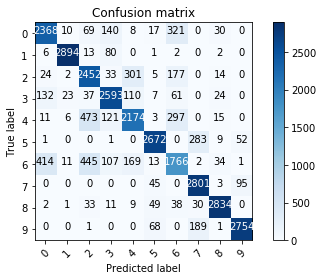

In [12]:
plt.figure()
plot_confusion_matrix(neural_conf_matrix_val, np.arange(10))
plt.show()

## Test Results

The following cells are predicting the outputs for the test dataset

In [13]:
## Result with Logistic Regression TEST
logistic_y_pred = logistic_model.Predict(dataset_test, target_test)
logistic_conf_matrix_test = confusion_matrix(target_test, logistic_y_pred)
logistic_class_report_test = classification_report(target_test, logistic_y_pred)
print(logistic_conf_matrix_test)
print(logistic_class_report_test)

Predicting Class: 10 / 10: 100%|██████████| 10000/10000 [00:00<00:00, 253060.70it/s]


[[954   2   8   9   1   0  18   0   8   0]
 [ 11 979   0   6   0   0   4   0   0   0]
 [111   8 534   6 266   0  66   0   9   0]
 [185  37   3 718  37   0  20   0   0   0]
 [ 40   1  24  17 864   1  47   0   6   0]
 [ 78   2   2   1   1 714   3 130  19  50]
 [392   5  74  14 180   1 317   0  16   1]
 [  8   0   1   0   0  20   0 898   1  72]
 [ 82   1  12   6  10   5  24  13 841   6]
 [ 11   1   1   0   0  14   2  72   4 895]]
             precision    recall  f1-score   support

          0       0.51      0.95      0.66      1000
          1       0.94      0.98      0.96      1000
          2       0.81      0.53      0.64      1000
          3       0.92      0.72      0.81      1000
          4       0.64      0.86      0.73      1000
          5       0.95      0.71      0.81      1000
          6       0.63      0.32      0.42      1000
          7       0.81      0.90      0.85      1000
          8       0.93      0.84      0.88      1000
          9       0.87      0.90      

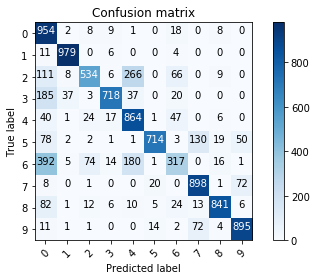

In [14]:
plt.figure()
plot_confusion_matrix(logistic_conf_matrix_test, np.arange(10))
plt.show()

In [15]:
## Result with Softmax Regression TEST
softmax_y_pred = softmax_model.Predict(dataset_test, target_test)
softmax_conf_matrix_test = confusion_matrix(target_test, softmax_y_pred)
softmax_class_report_test = classification_report(target_test, softmax_y_pred)
print(softmax_conf_matrix_test)
print(softmax_class_report_test)

Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 25245.58it/s]


[[950   3  13   6   0   0  19   1   8   0]
 [ 27 956  10   5   0   1   1   0   0   0]
 [ 67   2 834  10  52   0  24   0  11   0]
 [211  55  14 690  16   0  13   0   1   0]
 [ 40   6 325  27 570   0  28   0   4   0]
 [ 13   0   0   0   0 847   0  56  22  62]
 [343   5 206  11 134   0 283   0  17   1]
 [  5   0   0   0   0  36   0 859   0 100]
 [ 45   0   8   6   6   4  10   6 912   3]
 [  1   0   0   0   0  17   0  33   3 946]]
             precision    recall  f1-score   support

          0       0.56      0.95      0.70      1000
          1       0.93      0.96      0.94      1000
          2       0.59      0.83      0.69      1000
          3       0.91      0.69      0.79      1000
          4       0.73      0.57      0.64      1000
          5       0.94      0.85      0.89      1000
          6       0.75      0.28      0.41      1000
          7       0.90      0.86      0.88      1000
          8       0.93      0.91      0.92      1000
          9       0.85      0.95      

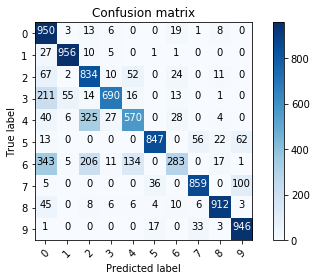

In [16]:
plt.figure()
plot_confusion_matrix(softmax_conf_matrix_test, np.arange(10))
plt.show()

In [17]:
## Result with ReLU, 512 hidden neurons and 1 hidden layer TEST
neural_y_pred = neural_model.Predict(dataset_test, target_test)
neural_conf_matrix = confusion_matrix(target_test, neural_y_pred)
neural_class_report = classification_report(target_test, neural_y_pred)
print(neural_conf_matrix)
print(neural_class_report)

Predicting: 100%|██████████| 10000/10000 [00:06<00:00, 1493.33it/s]

[[801   3  24  44   0  12 105   0  11   0]
 [  1 971   6  19   0   1   2   0   0   0]
 [  9   1 812  11 101   2  60   0   4   0]
 [ 38  14  18 893  19   4  12   0   2   0]
 [  1   4 116  27 746   3  99   0   4   0]
 [  0   0   1   1   0 876   0 101   2  19]
 [151   3 163  39  46   1 585   0  12   0]
 [  0   0   0   0   0  18   0 937   0  45]
 [  0   0  10   3   2  12  10  12 951   0]
 [  0   0   0   0   0  17   0  65   1 917]]
             precision    recall  f1-score   support

          0       0.80      0.80      0.80      1000
          1       0.97      0.97      0.97      1000
          2       0.71      0.81      0.76      1000
          3       0.86      0.89      0.88      1000
          4       0.82      0.75      0.78      1000
          5       0.93      0.88      0.90      1000
          6       0.67      0.58      0.62      1000
          7       0.84      0.94      0.89      1000
          8       0.96      0.95      0.96      1000
          9       0.93      0.92      

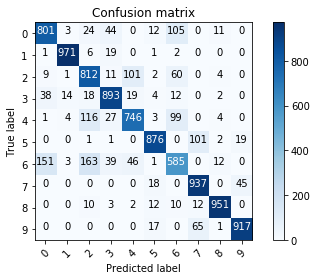

In [18]:
plt.figure()
plot_confusion_matrix(neural_conf_matrix, np.arange(10))
plt.show()